                                            Practical 9                                                                   
Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of 
age with respect to each gender along with the information about whether they survived or 
not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
median_age = data['age'].mean()
data['age'].fillna(median_age, inplace=True)

In [19]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# Calculate first quartile (Q1) and third quartile (Q3)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

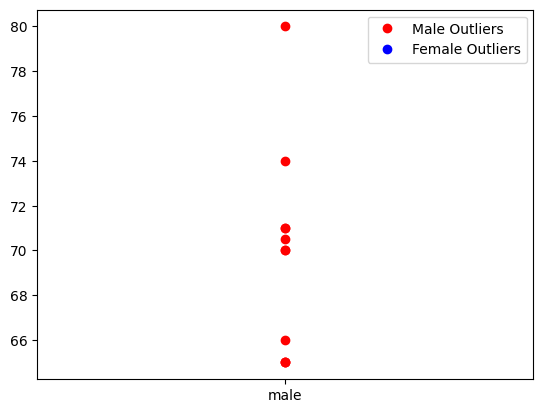

In [17]:
# Highlight outliers on the plot
plt.plot(outliers[outliers['sex'] == 'male']['sex'], outliers[outliers['sex'] == 'male']['age'], 'ro', label='Male Outliers')
plt.plot(outliers[outliers['sex'] == 'female']['sex'], outliers[outliers['sex'] == 'female']['age'], 'bo', label='Female Outliers')
plt.legend()

plt.show()

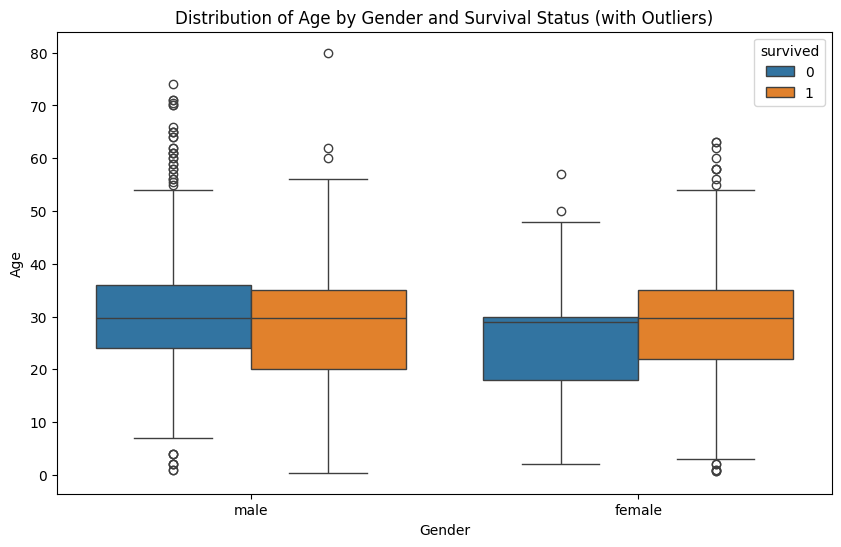

In [23]:
# Plotting the box plot with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=data)
plt.title('Distribution of Age by Gender and Survival Status (with Outliers)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [24]:
# Filter the dataset to include only survivors
survived_passengers = data[data['survived'] == 1]

# Count the number of survivors by gender
survivors_by_gender = survived_passengers['sex'].value_counts()

# Display the count of survivors by gender
print("Number of survivors by gender:")
print(survivors_by_gender)

Number of survivors by gender:
sex
female    233
male      109
Name: count, dtype: int64
